#### Student: Matheus Kempa Severino

#### Udacity Capstone Project

## Data Exploration

This part will be to explore the data and check the variables

In [434]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


base = pd.read_excel("Brasileirao.xlsx")
base = base.drop(columns=["Unnamed: 0","Unnamed: 0.1"])
#taking a look at the database
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11387 entries, 0 to 11386
Data columns (total 28 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Player           11387 non-null  object 
 1   #                10627 non-null  float64
 2   Nation           10627 non-null  object 
 3   Pos              10627 non-null  object 
 4   Min              11371 non-null  float64
 5   Gls              11387 non-null  int64  
 6   Ast              11387 non-null  int64  
 7   PK               11387 non-null  int64  
 8   PKatt            11387 non-null  int64  
 9   Sh               11387 non-null  int64  
 10  SoT              11387 non-null  int64  
 11  CrdY             11387 non-null  int64  
 12  CrdR             11387 non-null  int64  
 13  Fls              11387 non-null  int64  
 14  Fld              11387 non-null  int64  
 15  Off              11387 non-null  int64  
 16  Crs              11387 non-null  int64  
 17  TklW        

In [435]:
base.columns

Index(['Player', '#', 'Nation', 'Pos', 'Min', 'Gls', 'Ast', 'PK', 'PKatt',
       'Sh', 'SoT', 'CrdY', 'CrdR', 'Fls', 'Fld', 'Off', 'Crs', 'TklW', 'Int',
       'OG', 'PKwon', 'PKcon', 'Time', 'Time_Adversario', 'Confronto', 'Data',
       'Estadio', 'Torcida'],
      dtype='object')

In [436]:
base.head(16)
#look at the 14 line - there is a problem, the database summed all the players statistics, we have to take it out

total_filter = []
for i in base.Player:
    if "Players" in i:
        a = 1
    else:
        a = 0
    total_filter.append(a)
    
totalfilter = pd.DataFrame(total_filter)    

base["Filtro"] = totalfilter

# Torcida as number
base.Torcida = base.Torcida.str.replace(",",".")
base.Torcida = base.Torcida.astype(float)

#filtering the dtframe
base = base[base.Filtro.eq(0)]
#now we have almost have a correct database, but still need some treatments


base.head(16)

,Player,#,Nation,Pos,Min,Gls,Ast,PK,PKatt,Sh,...,OG,PKwon,PKcon,Time,Time_Adversario,Confronto,Data,Estadio,Torcida,Filtro
0,Franco Di Santo,26.0,ar ARG,FW,90.0,0,0,0,0,0,...,0,NaN,NaN,Atlético Mineiro,Atlético Paranaense,Atlético_Mineiro_vs_Atlético_Paranaense,2019-11-24,"Estádio Raimundo Sampaio, Belo Horizonte",34.432,0
1,Luan,27.0,br BRA,LW,82.0,0,0,0,0,0,...,0,NaN,NaN,Atlético Mineiro,Atlético Paranaense,Atlético_Mineiro_vs_Atlético_Paranaense,2019-11-24,"Estádio Raimundo Sampaio, Belo Horizonte",34.432,0
2,Vinícius,29.0,br BRA,MF,8.0,0,0,0,0,0,...,0,NaN,NaN,Atlético Mineiro,Atlético Paranaense,Atlético_Mineiro_vs_Atlético_Paranaense,2019-11-24,"Estádio Raimundo Sampaio, Belo Horizonte",34.432,0
3,Rómulo Otero,80.0,ve VEN,AM,76.0,0,0,0,0,0,...,0,NaN,NaN,Atlético Mineiro,Atlético Paranaense,Atlético_Mineiro_vs_Atlético_Paranaense,2019-11-24,"Estádio Raimundo Sampaio, Belo Horizonte",34.432,0
4,Geuvânio,49.0,br BRA,"FW,MF",14.0,0,0,0,0,0,...,0,NaN,NaN,Atlético Mineiro,Atlético Paranaense,Atlético_Mineiro_vs_Atlético_Paranaense,2019-11-24,"Estádio Raimundo Sampaio, Belo Horizonte",34.432,0
5,Marquinhos,50.0,br BRA,AM,90.0,0,0,0,0,0,...,0,NaN,NaN,Atlético Mineiro,Atlético Paranaense,Atlético_Mineiro_vs_Atlético_Paranaense,2019-11-24,"Estádio Raimundo Sampaio, Belo Horizonte",34.432,0
6,Juan Cazares,10.0,ec ECU,RW,67.0,0,0,0,0,0,...,0,NaN,NaN,Atlético Mineiro,Atlético Paranaense,Atlético_Mineiro_vs_Atlético_Paranaense,2019-11-24,"Estádio Raimundo Sampaio, Belo Horizonte",34.432,0
7,Bruninho,43.0,br BRA,MF,23.0,0,0,0,0,0,...,0,NaN,NaN,Atlético Mineiro,Atlético Paranaense,Atlético_Mineiro_vs_Atlético_Paranaense,2019-11-24,"Estádio Raimundo Sampaio, Belo Horizonte",34.432,0
8,José Welison,14.0,br BRA,DM,90.0,0,0,0,0,0,...,0,NaN,NaN,Atlético Mineiro,Atlético Paranaense,Atlético_Mineiro_vs_Atlético_Paranaense,2019-11-24,"Estádio Raimundo Sampaio, Belo Horizonte",34.432,0
9,Fábio Santos,6.0,br BRA,LB,90.0,0,0,0,0,0,...,0,NaN,NaN,Atlético Mineiro,Atlético Paranaense,Atlético_Mineiro_vs_Atlético_Paranaense,2019-11-24,"Estádio Raimundo Sampaio, Belo Horizonte",34.432,0


In [437]:
base.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10627 entries, 0 to 11385
Data columns (total 29 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Player           10627 non-null  object 
 1   #                10627 non-null  float64
 2   Nation           10627 non-null  object 
 3   Pos              10627 non-null  object 
 4   Min              10611 non-null  float64
 5   Gls              10627 non-null  int64  
 6   Ast              10627 non-null  int64  
 7   PK               10627 non-null  int64  
 8   PKatt            10627 non-null  int64  
 9   Sh               10627 non-null  int64  
 10  SoT              10627 non-null  int64  
 11  CrdY             10627 non-null  int64  
 12  CrdR             10627 non-null  int64  
 13  Fls              10627 non-null  int64  
 14  Fld              10627 non-null  int64  
 15  Off              10627 non-null  int64  
 16  Crs              10627 non-null  int64  
 17  TklW        

## Look at Data

This part is where take a look in the Data

In [438]:
base_br = base.groupby(['Confronto','Time',"Data"], as_index=False)['Gls','Ast', 'PK', 'PKatt', 'Sh', 'SoT', 'CrdY', 'CrdR','Crs',
                                                                    'Fls','TklW', 'Int', 'Fld','Torcida','OG','Off'].sum()

base_br

# but we don't have the results of the matches in this database, so lets generate the results(victory,loss,draw) for each team
# and for every match, by that we are going t be able to take a real good look at all data, and how it's distribuited.

C:\Users\mathe\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,Confronto,Time,Data,Gls,Ast,PK,PKatt,Sh,SoT,CrdY,CrdR,Crs,Fls,TklW,Int,Fld,Torcida,OG,Off
0,Atlético_Mineiro_vs_Atlético_Paranaense,Atlético Mineiro,2019-11-24,0,0,0,0,0,0,3,0,0,0,0,0,0,482.048,0,0
1,Atlético_Mineiro_vs_Atlético_Paranaense,Atlético Paranaense,2019-11-24,1,0,0,0,1,1,2,0,0,0,0,0,0,482.048,0,0
2,Atlético_Mineiro_vs_Avaí,Atlético Mineiro,2019-04-27,2,1,1,1,11,3,0,0,18,12,13,15,17,147.434,0,0
3,Atlético_Mineiro_vs_Avaí,Avaí,2019-04-27,1,1,0,0,7,2,1,0,15,18,11,18,11,147.434,0,2
4,Atlético_Mineiro_vs_Bahia,Atlético Mineiro,2019-08-24,0,0,0,0,20,7,0,0,25,17,8,8,15,313.614,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
755,Vasco_da_Gama_vs_Palmeiras,Vasco da Gama,2019-11-06,0,0,0,0,8,3,7,1,14,17,12,13,26,118.888,0,1
756,Vasco_da_Gama_vs_Santos,Santos,2019-10-05,1,1,0,0,8,4,2,1,12,17,5,5,13,239.162,0,1
757,Vasco_da_Gama_vs_Santos,Vasco da Gama,2019-10-05,0,0,0,1,16,2,4,0,29,15,10,14,17,256.245,0,1
758,Vasco_da_Gama_vs_São_Paulo,São Paulo,2019-08-25,0,0,0,0,3,1,3,1,8,16,9,9,16,285.656,0,2


In [439]:
#This code is to create a new column with the result of the match

confrontos = pd.DataFrame(base_br.Confronto.drop_duplicates())
confrontos = confrontos.reset_index(drop=True)

teste = []

for i in confrontos.Confronto:
    i = str(i)
    oi = base_br.loc[base_br["Confronto"]==i]
    oi = oi.reset_index(drop=True)
    b = (oi.Gls[0]+oi.OG[1])-(oi.Gls[1]+oi.OG[0])#gols +own gols of the other team
    if b <0:
        a = 0#to losers
        b = 1#to winners
        teste.append(a)
        teste.append(b)
    elif b>0:
        a = 1#to winners
        b = 0#to losers
        teste.append(a)
        teste.append(b)
    else:
        a = 2#draw
        b = 2#draw
        teste.append(a)
        teste.append(b)        

        
teste = pd.DataFrame(teste)
base_br["Resultado"] = teste


base_br.head(25)

,Confronto,Time,Data,Gls,Ast,PK,PKatt,Sh,SoT,CrdY,CrdR,Crs,Fls,TklW,Int,Fld,Torcida,OG,Off,Resultado
0,Atlético_Mineiro_vs_Atlético_Paranaense,Atlético Mineiro,2019-11-24,0,0,0,0,0,0,3,0,0,0,0,0,0,482.048,0,0,0
1,Atlético_Mineiro_vs_Atlético_Paranaense,Atlético Paranaense,2019-11-24,1,0,0,0,1,1,2,0,0,0,0,0,0,482.048,0,0,1
2,Atlético_Mineiro_vs_Avaí,Atlético Mineiro,2019-04-27,2,1,1,1,11,3,0,0,18,12,13,15,17,147.434,0,0,1
3,Atlético_Mineiro_vs_Avaí,Avaí,2019-04-27,1,1,0,0,7,2,1,0,15,18,11,18,11,147.434,0,2,0
4,Atlético_Mineiro_vs_Bahia,Atlético Mineiro,2019-08-24,0,0,0,0,20,7,0,0,25,17,8,8,15,313.614,0,1,0
5,Atlético_Mineiro_vs_Bahia,Bahia,2019-08-24,1,1,0,0,6,5,2,0,9,16,6,12,16,313.614,0,0,1
6,Atlético_Mineiro_vs_Botafogo_(RJ),Atlético Mineiro,2019-12-04,2,2,0,0,27,8,1,0,13,11,4,6,8,390.936,0,2,1
7,Atlético_Mineiro_vs_Botafogo_(RJ),Botafogo (RJ),2019-12-04,0,0,0,0,13,6,3,0,21,10,7,1,9,390.936,0,1,0
8,Atlético_Mineiro_vs_CSA,Atlético Mineiro,2019-06-02,4,2,1,1,27,7,0,0,23,2,8,10,10,197.624,0,2,1
9,Atlético_Mineiro_vs_CSA,CSA,2019-06-02,0,0,0,0,12,0,3,0,17,11,7,13,2,197.624,0,0,0


#### Adding the place column as variable

In [440]:
o = []
for i,j in zip(base_br.Confronto,base_br.Time):
    a = i.split("_vs")
    a = a[0].replace("_"," ")
    if a == j:
        a="Home"
    else:
        a="Away"
    o.append(a)

teste = pd.DataFrame(o)
base_br["Place"] = teste
base_br

    

,Confronto,Time,Data,Gls,Ast,PK,PKatt,Sh,SoT,CrdY,...,Crs,Fls,TklW,Int,Fld,Torcida,OG,Off,Resultado,Place
0,Atlético_Mineiro_vs_Atlético_Paranaense,Atlético Mineiro,2019-11-24,0,0,0,0,0,0,3,...,0,0,0,0,0,482.048,0,0,0,Home
1,Atlético_Mineiro_vs_Atlético_Paranaense,Atlético Paranaense,2019-11-24,1,0,0,0,1,1,2,...,0,0,0,0,0,482.048,0,0,1,Away
2,Atlético_Mineiro_vs_Avaí,Atlético Mineiro,2019-04-27,2,1,1,1,11,3,0,...,18,12,13,15,17,147.434,0,0,1,Home
3,Atlético_Mineiro_vs_Avaí,Avaí,2019-04-27,1,1,0,0,7,2,1,...,15,18,11,18,11,147.434,0,2,0,Away
4,Atlético_Mineiro_vs_Bahia,Atlético Mineiro,2019-08-24,0,0,0,0,20,7,0,...,25,17,8,8,15,313.614,0,1,0,Home
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
755,Vasco_da_Gama_vs_Palmeiras,Vasco da Gama,2019-11-06,0,0,0,0,8,3,7,...,14,17,12,13,26,118.888,0,1,0,Home
756,Vasco_da_Gama_vs_Santos,Santos,2019-10-05,1,1,0,0,8,4,2,...,12,17,5,5,13,239.162,0,1,1,Away
757,Vasco_da_Gama_vs_Santos,Vasco da Gama,2019-10-05,0,0,0,1,16,2,4,...,29,15,10,14,17,256.245,0,1,0,Home
758,Vasco_da_Gama_vs_São_Paulo,São Paulo,2019-08-25,0,0,0,0,3,1,3,...,8,16,9,9,16,285.656,0,2,0,Away


In [441]:
base_br.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 760 entries, 0 to 759
Data columns (total 21 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Confronto  760 non-null    object 
 1   Time       760 non-null    object 
 2   Data       760 non-null    object 
 3   Gls        760 non-null    int64  
 4   Ast        760 non-null    int64  
 5   PK         760 non-null    int64  
 6   PKatt      760 non-null    int64  
 7   Sh         760 non-null    int64  
 8   SoT        760 non-null    int64  
 9   CrdY       760 non-null    int64  
 10  CrdR       760 non-null    int64  
 11  Crs        760 non-null    int64  
 12  Fls        760 non-null    int64  
 13  TklW       760 non-null    int64  
 14  Int        760 non-null    int64  
 15  Fld        760 non-null    int64  
 16  Torcida    760 non-null    float64
 17  OG         760 non-null    int64  
 18  Off        760 non-null    int64  
 19  Resultado  760 non-null    int64  
 20  Place     

## Attacking General Approach

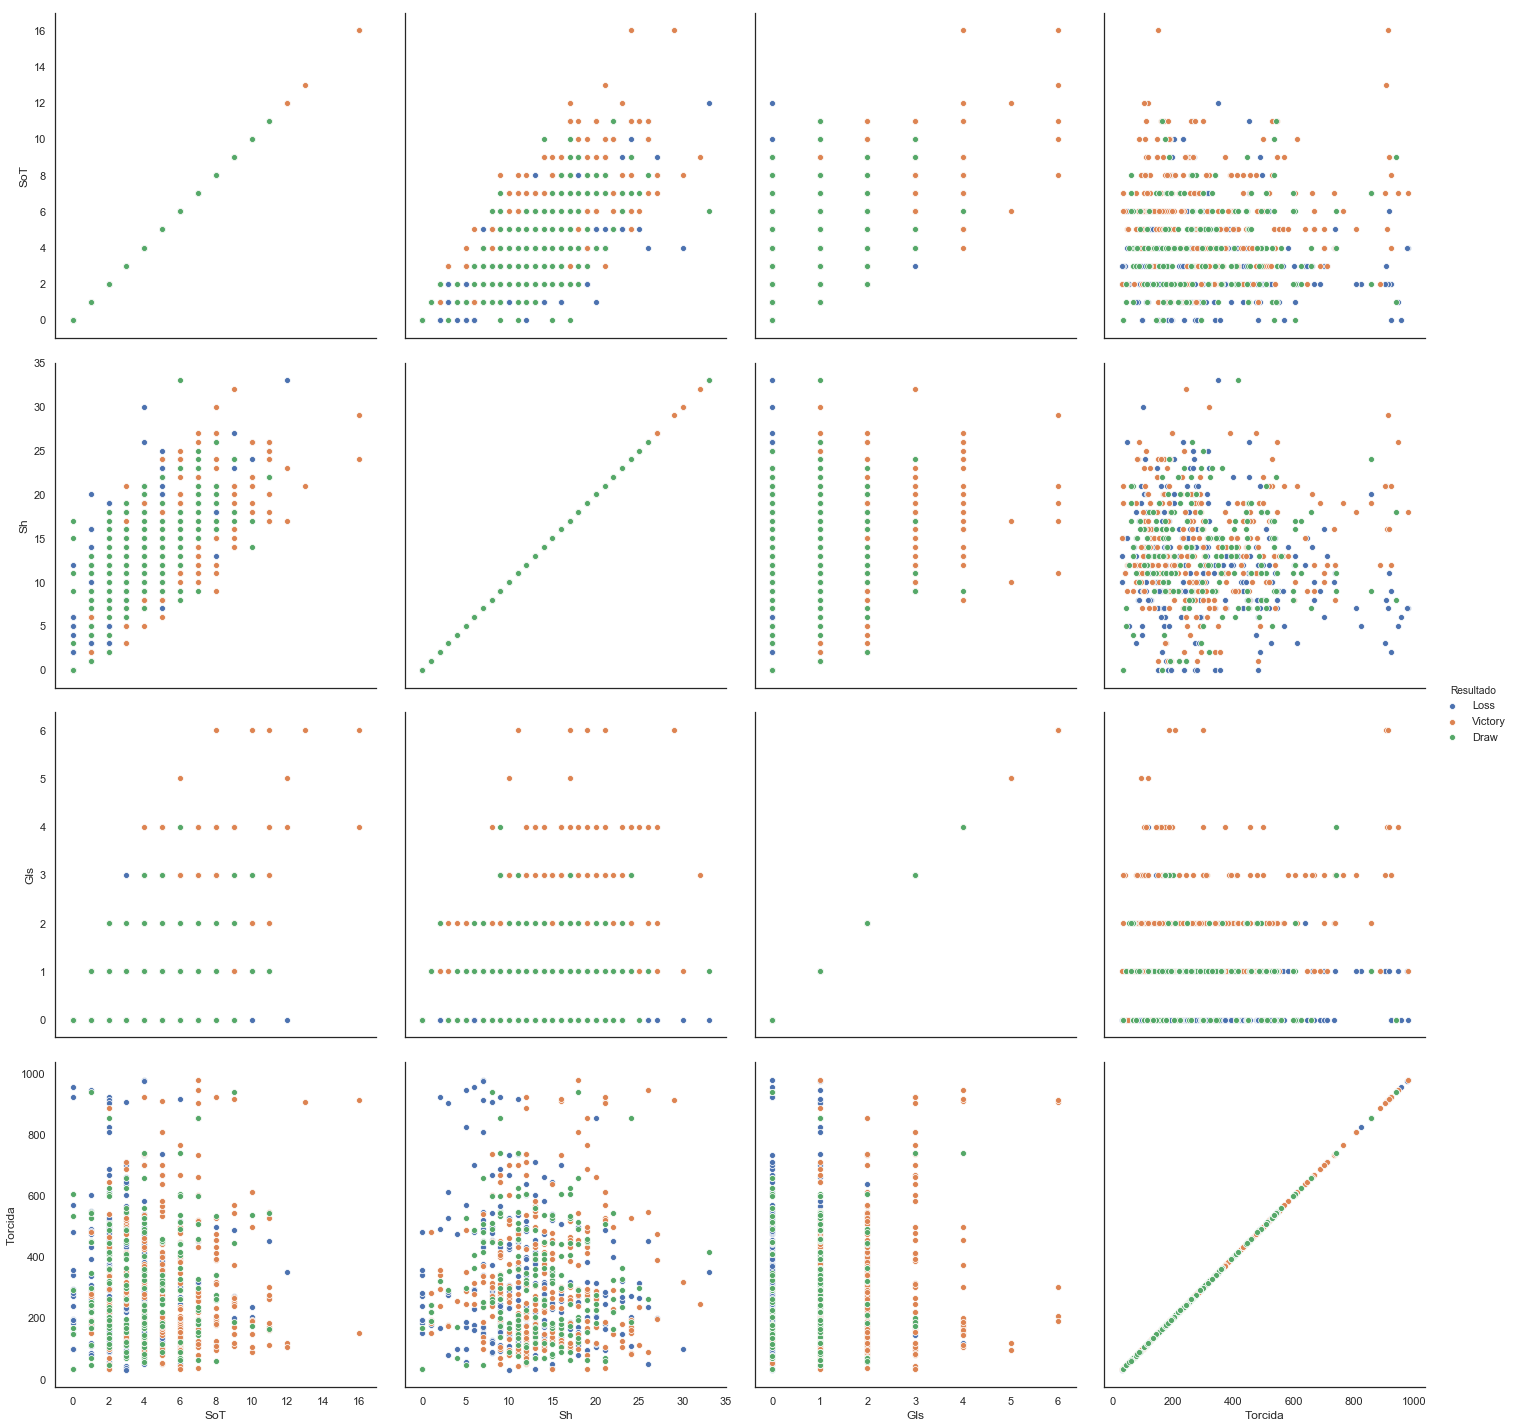

In [442]:
base_teste = base_br.drop(columns=["Confronto","Time","Data"])
base_teste= base_teste.reset_index(drop=True)

di = {0: "Loss",
      1: "Victory",
      2: "Draw"}

base_teste = base_teste.replace({'Resultado':di})



g = sns.PairGrid(base_teste, vars=["SoT","Sh","Gls","Torcida"], hue="Resultado",height=5)
oi = g.map(sns.scatterplot)
g.add_legend()

## Defense General Approach

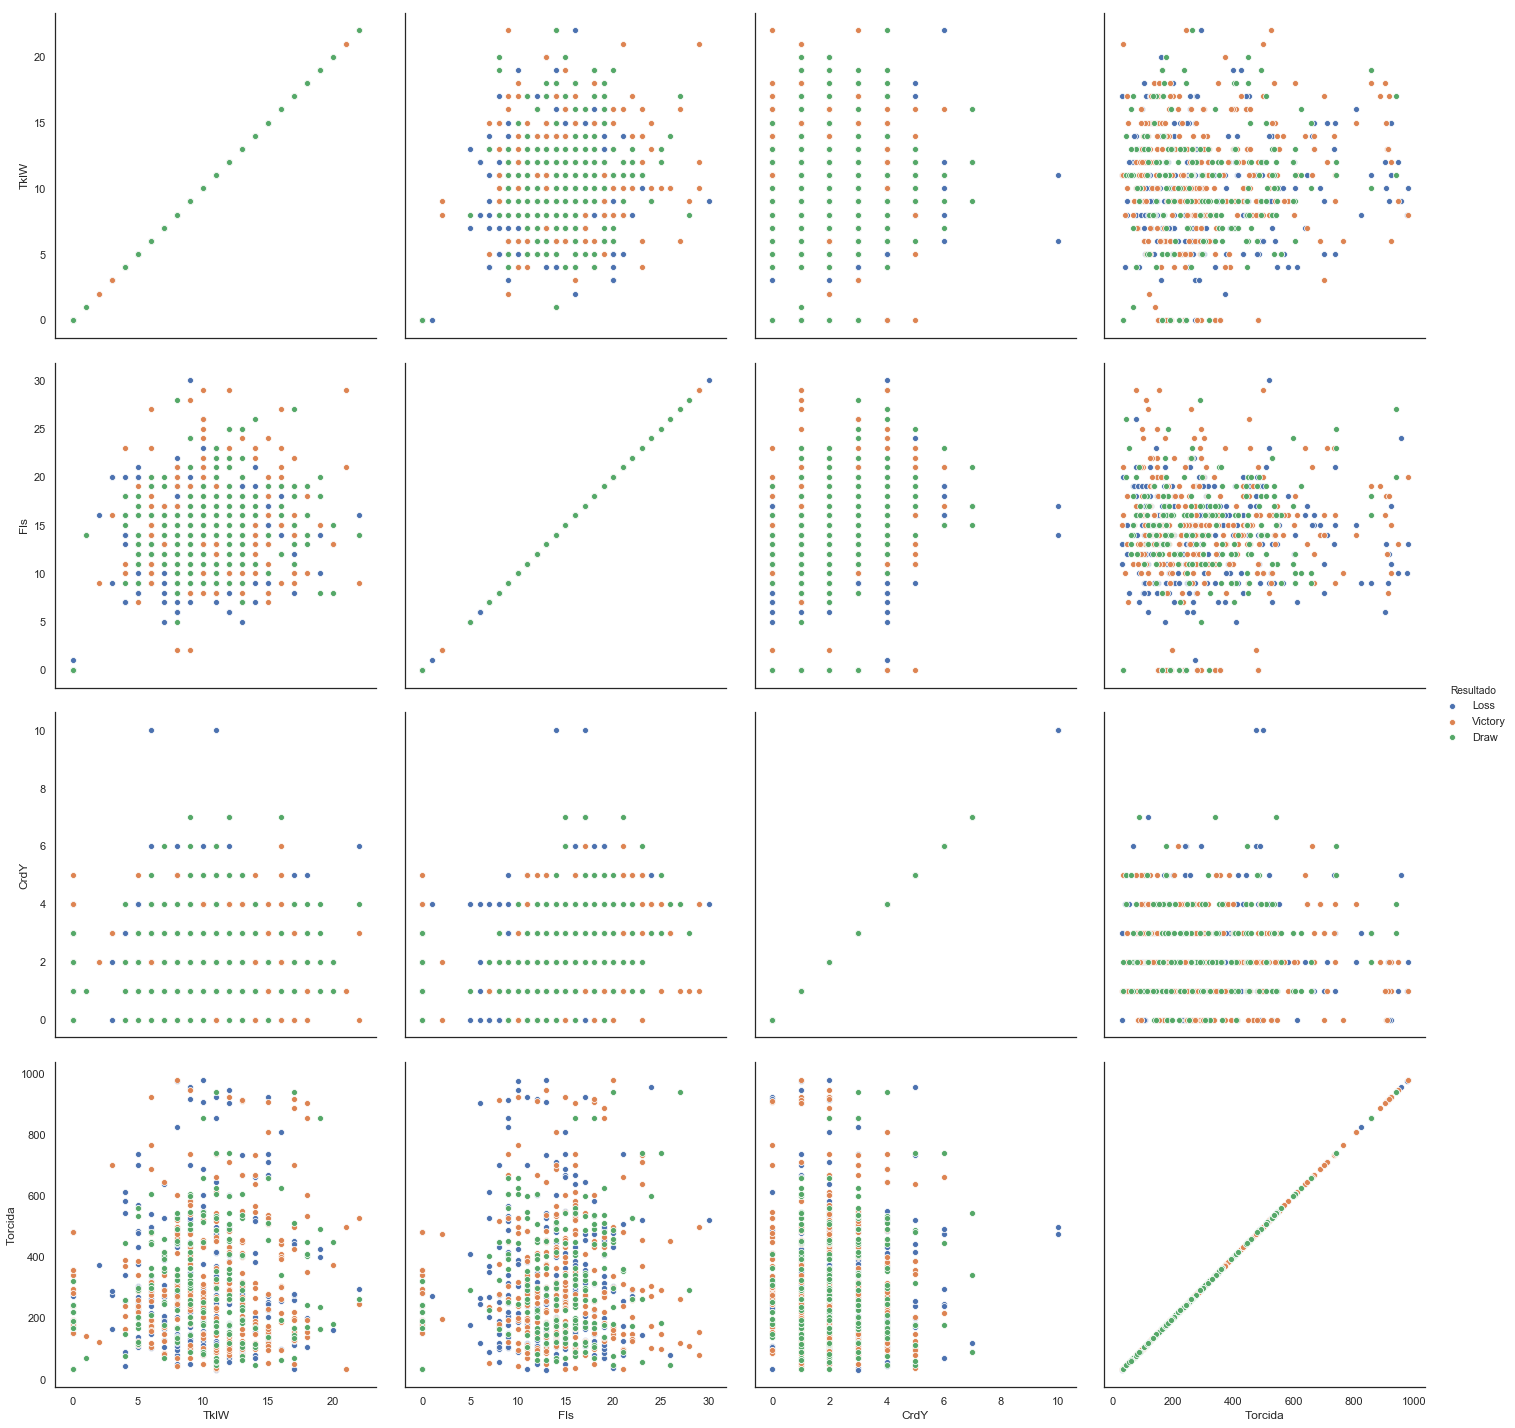

In [443]:
g = sns.PairGrid(base_teste, vars=["TklW","Fls","CrdY","Torcida"], hue="Resultado",height=5)
oi = g.map(sns.scatterplot)
g.add_legend()

## Optional

If the user wants to create a analysis for every team. Then these functions were created to help in this taks.

In [444]:
def atack_team(team,place):
    '''
    Description: Generates attacking graphs analysis for a desired team and for a desired place
    
    Inputs:
        - Team: Name of the team desired (str)
        - place: Home/Away (str)
    
    Outputs:
    
    '''
    base_teste = base_br.loc[base_br["Time"]==team]
    
    base_teste = base_br.loc[base_br["Place"]==place]

    base_teste = base_teste.drop(columns=["Confronto","Time","Data"])

    base_teste= base_teste.reset_index(drop=True)

    di = {0: "Loss",
          1: "Victory",
          2: "Draw"}

    base_teste = base_teste.replace({'Resultado':di})

    g = sns.PairGrid(base_teste, vars=["SoT","Sh","Gls","Torcida"], hue="Resultado",height=5)
    g.map(sns.scatterplot)
    g.add_legend()
    
    
    sns.relplot(x="SoT", y="Sh", hue="Resultado",size="Torcida",palette="muted",  
            sizes=(400, 100), alpha=1.,legend="brief",
            height=6, data=base_teste) 
    
    
def defense_team(team,place):
    '''
    Description: Generates attacking graphs analysis for a desired team and for a desired place
    
    Inputs:
        - Team: Name of the team desired (str)
        - place: Home/Away (str)
    
    Outputs:
    
    '''
    base_teste = base_br.loc[base_br["Time"]==team]
    
    base_teste = base_br.loc[base_br["Place"]==place]

    base_teste = base_teste.drop(columns=["Confronto","Time","Data"])

    base_teste= base_teste.reset_index(drop=True)

    di = {0: "Loss",
          1: "Victory",
          2: "Draw"}

    base_teste = base_teste.replace({'Resultado':di})

    g = sns.PairGrid(base_teste, vars=["TklW","Fls","CrdY","Torcida"], hue="Resultado",height=5)
    g.map(sns.scatterplot)
    g.add_legend()

    sns.relplot(x="Fls", y="TklW", hue="Resultado",size="CrdY",palette="muted",  
        sizes=(400, 100), alpha=1.,legend="brief",
        height=6, data=base_teste) 

#### Attacking Team Analysis

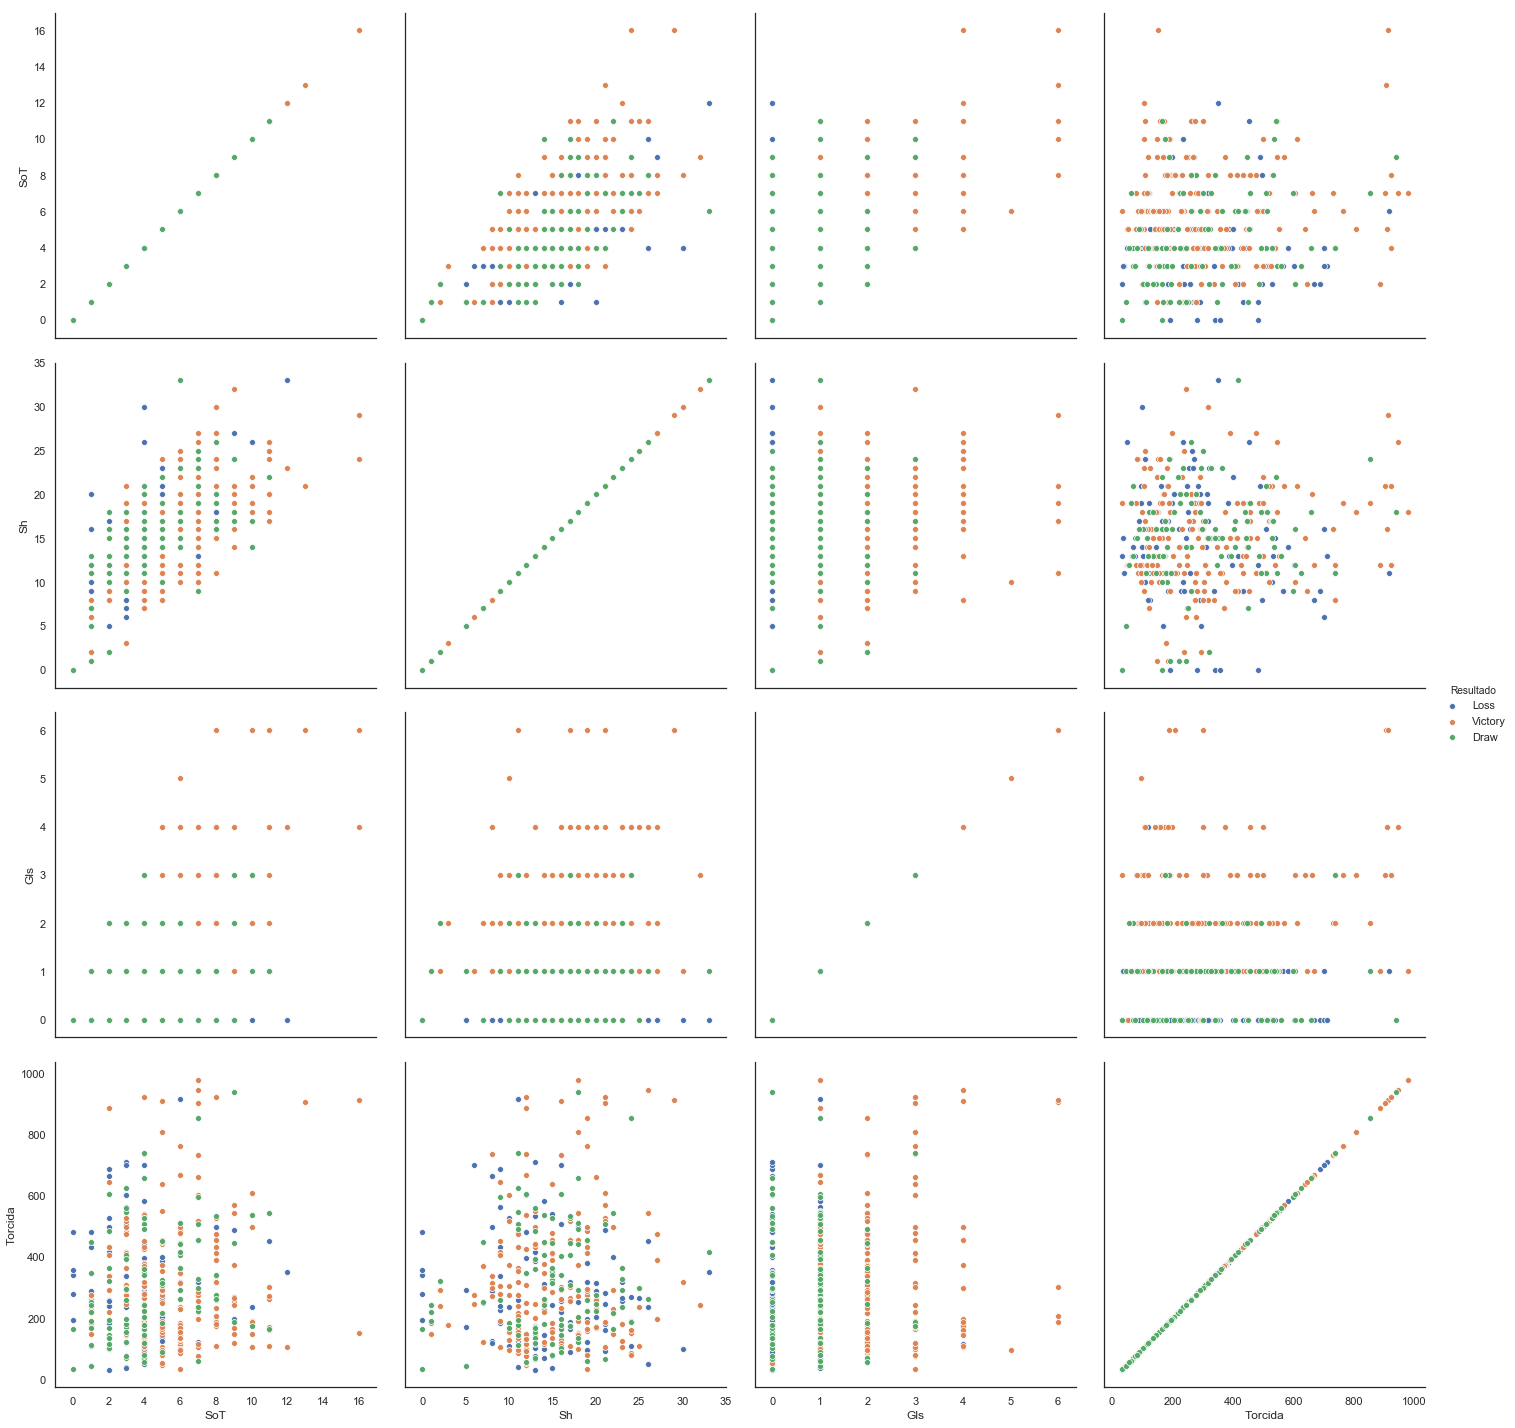

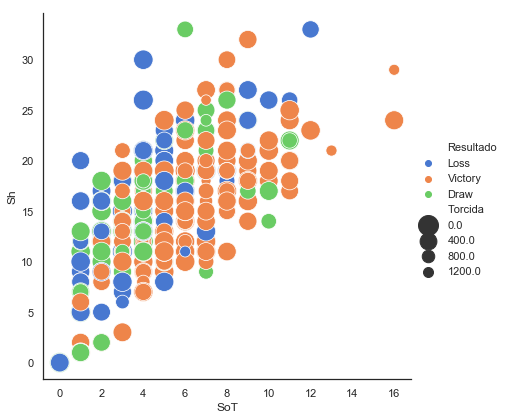

In [445]:
atack_team("Corinthians","Home")

#### Defense Team Analysis

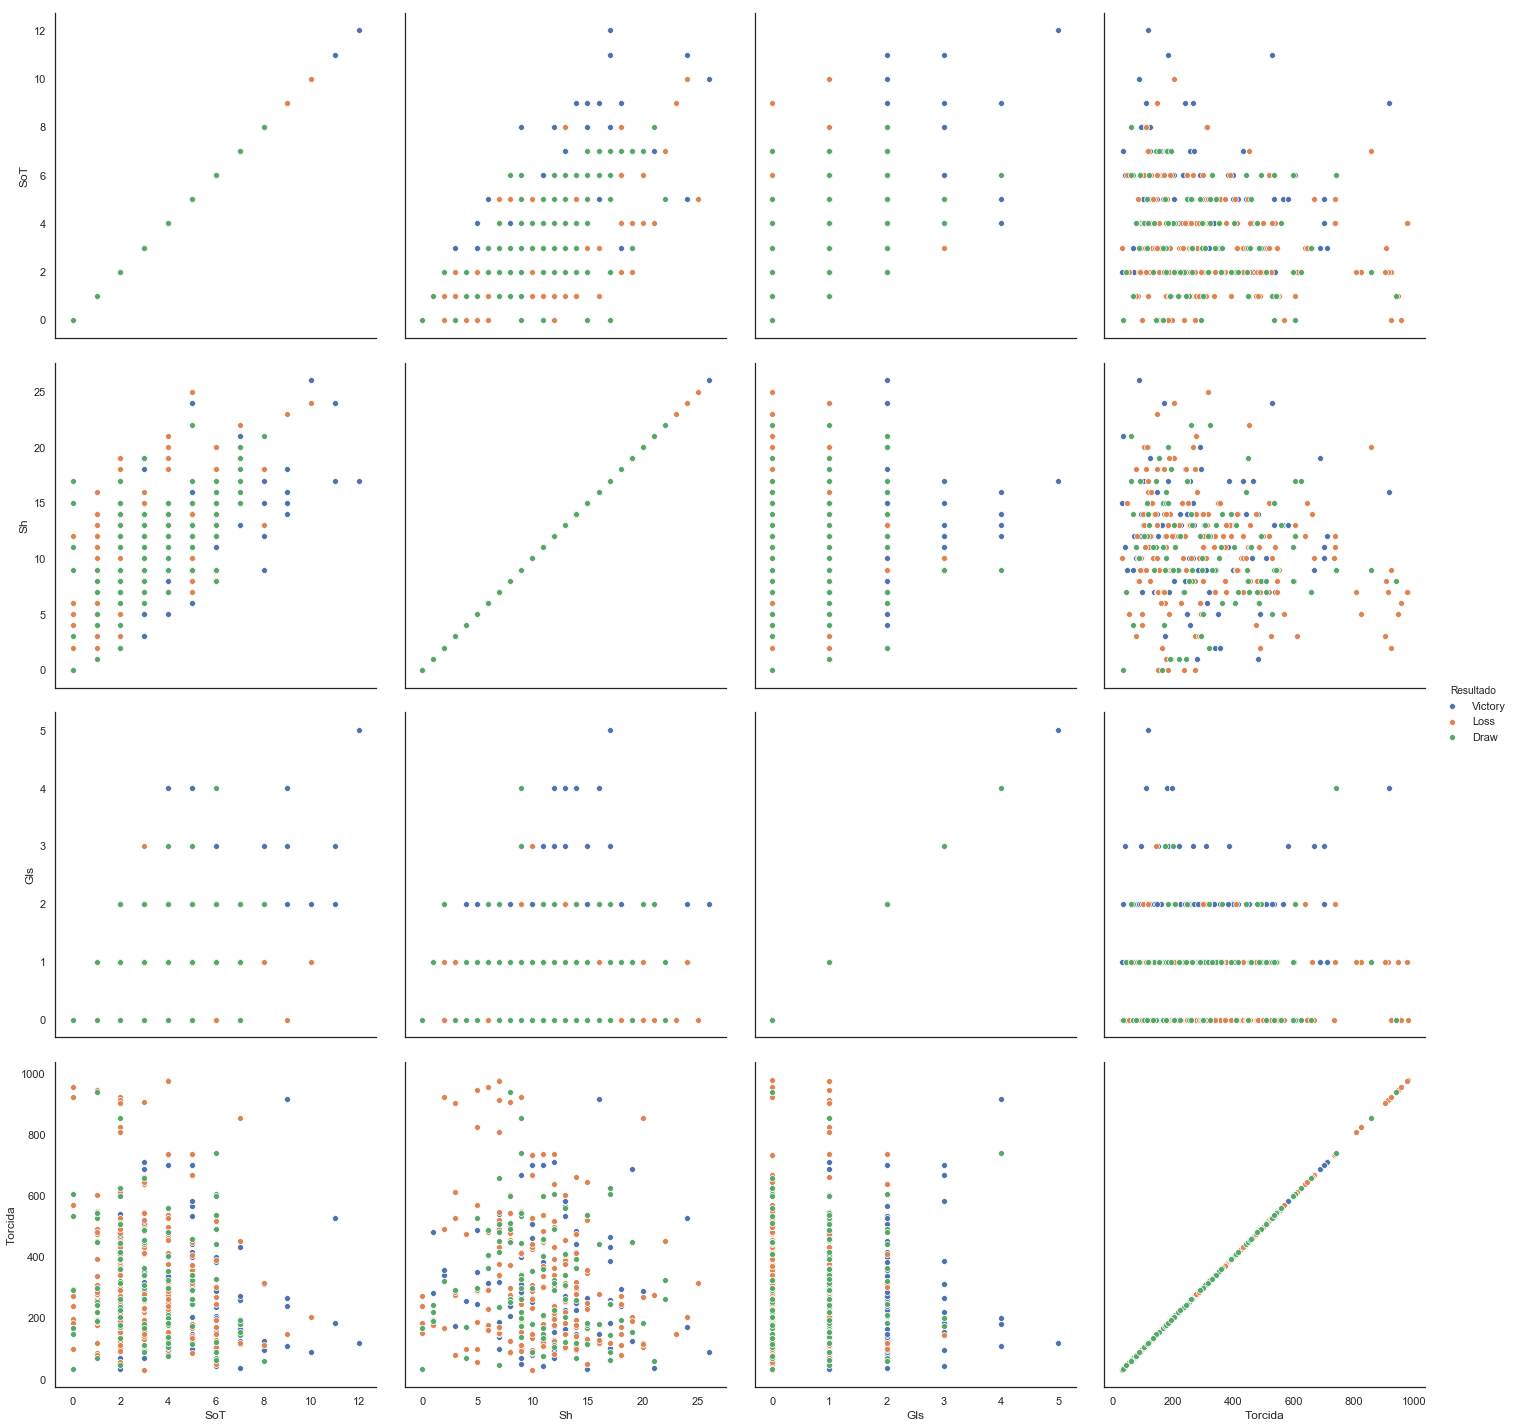

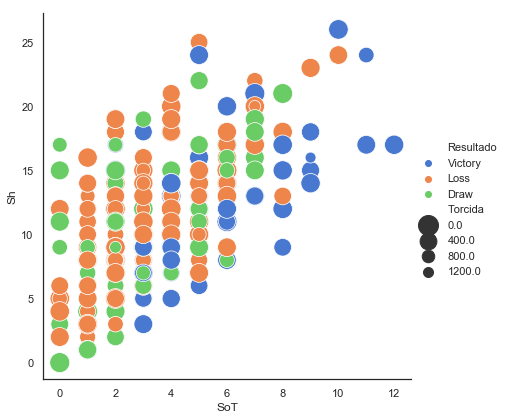

In [446]:
atack_team("Corinthians","Away")

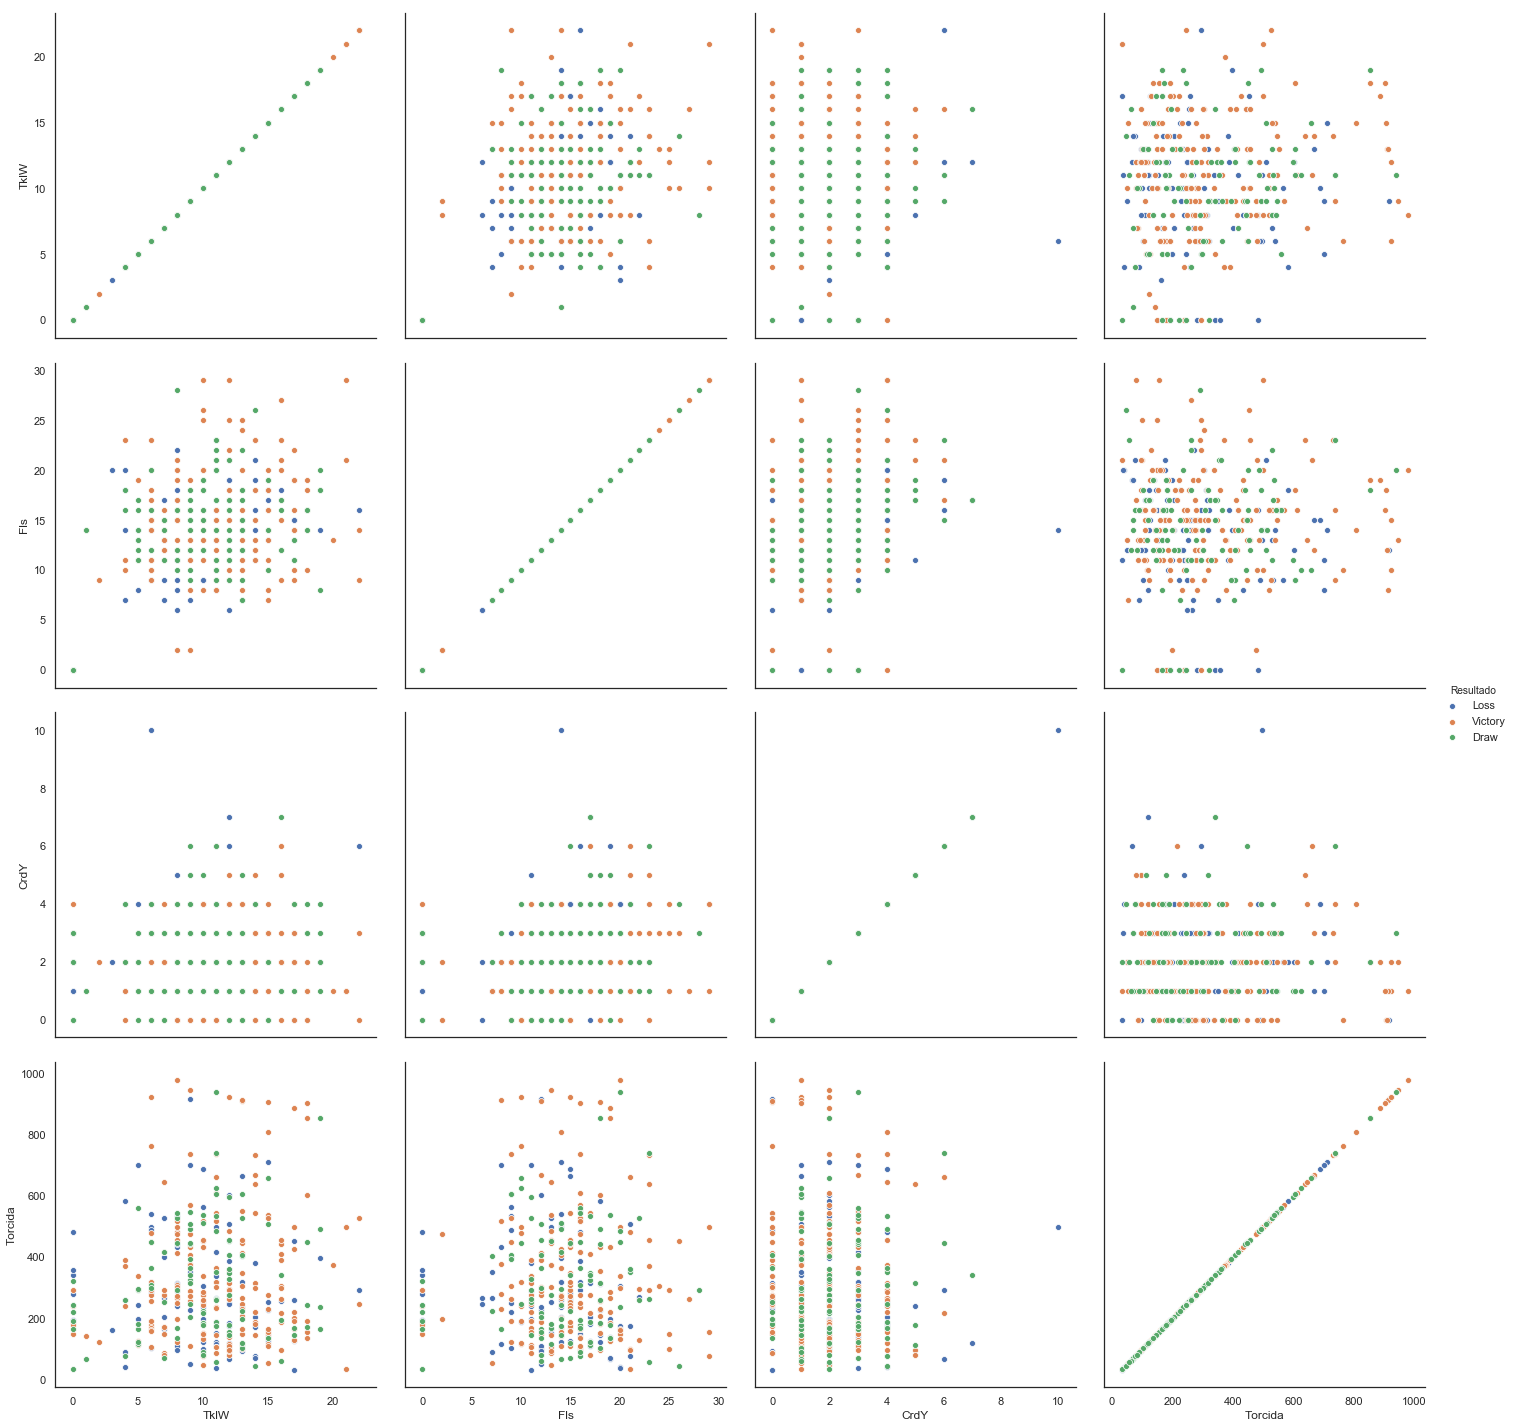

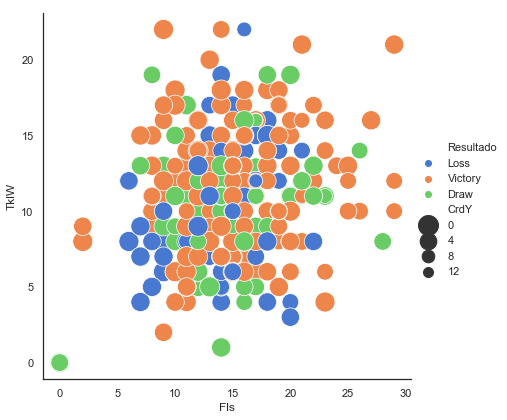

In [447]:
defense_team("Corinthians","Home")

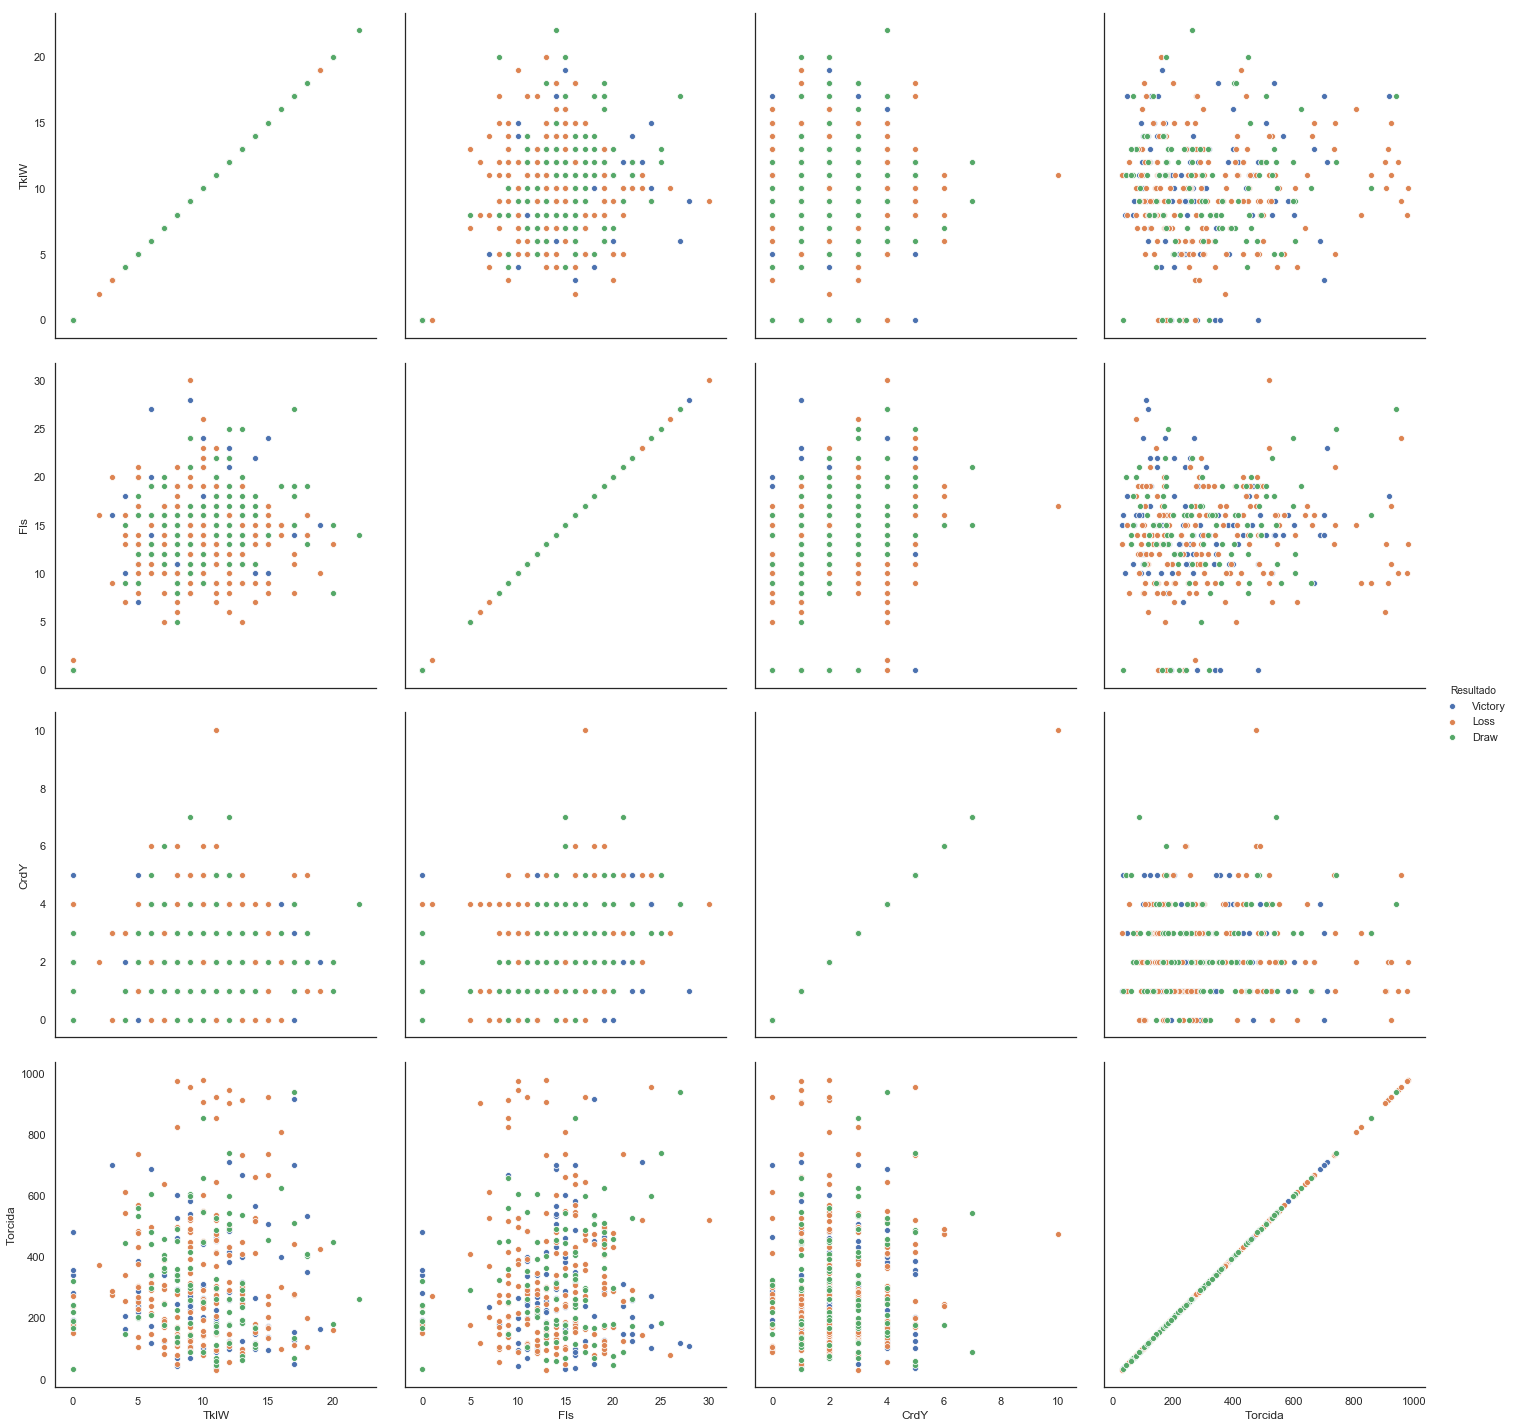

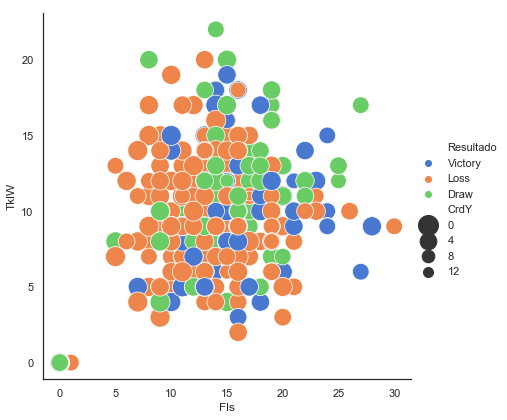

In [448]:
defense_team("Corinthians","Away")

In [450]:
base_br.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 760 entries, 0 to 759
Data columns (total 21 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Confronto  760 non-null    object 
 1   Time       760 non-null    object 
 2   Data       760 non-null    object 
 3   Gls        760 non-null    int64  
 4   Ast        760 non-null    int64  
 5   PK         760 non-null    int64  
 6   PKatt      760 non-null    int64  
 7   Sh         760 non-null    int64  
 8   SoT        760 non-null    int64  
 9   CrdY       760 non-null    int64  
 10  CrdR       760 non-null    int64  
 11  Crs        760 non-null    int64  
 12  Fls        760 non-null    int64  
 13  TklW       760 non-null    int64  
 14  Int        760 non-null    int64  
 15  Fld        760 non-null    int64  
 16  Torcida    760 non-null    float64
 17  OG         760 non-null    int64  
 18  Off        760 non-null    int64  
 19  Resultado  760 non-null    int64  
 20  Place     

# Pre processing

At this stage will be created some new columns to help the final prediction.

### Inserting new Data to facilitate work

In [451]:
#create a new Date for Data column
new_data_1 = [] 
for i in base_br.Data:
    i = str(i).replace("-","")
    new_data_1.append(i)

base_br["Data_new"] = pd.DataFrame(np.array(new_data_1))

base_br

,Confronto,Time,Data,Gls,Ast,PK,PKatt,Sh,SoT,CrdY,...,Fls,TklW,Int,Fld,Torcida,OG,Off,Resultado,Place,Data_new
0,Atlético_Mineiro_vs_Atlético_Paranaense,Atlético Mineiro,2019-11-24,0,0,0,0,0,0,3,...,0,0,0,0,482.048,0,0,0,Home,20191124
1,Atlético_Mineiro_vs_Atlético_Paranaense,Atlético Paranaense,2019-11-24,1,0,0,0,1,1,2,...,0,0,0,0,482.048,0,0,1,Away,20191124
2,Atlético_Mineiro_vs_Avaí,Atlético Mineiro,2019-04-27,2,1,1,1,11,3,0,...,12,13,15,17,147.434,0,0,1,Home,20190427
3,Atlético_Mineiro_vs_Avaí,Avaí,2019-04-27,1,1,0,0,7,2,1,...,18,11,18,11,147.434,0,2,0,Away,20190427
4,Atlético_Mineiro_vs_Bahia,Atlético Mineiro,2019-08-24,0,0,0,0,20,7,0,...,17,8,8,15,313.614,0,1,0,Home,20190824
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
755,Vasco_da_Gama_vs_Palmeiras,Vasco da Gama,2019-11-06,0,0,0,0,8,3,7,...,17,12,13,26,118.888,0,1,0,Home,20191106
756,Vasco_da_Gama_vs_Santos,Santos,2019-10-05,1,1,0,0,8,4,2,...,17,5,5,13,239.162,0,1,1,Away,20191005
757,Vasco_da_Gama_vs_Santos,Vasco da Gama,2019-10-05,0,0,0,1,16,2,4,...,15,10,14,17,256.245,0,1,0,Home,20191005
758,Vasco_da_Gama_vs_São_Paulo,São Paulo,2019-08-25,0,0,0,0,3,1,3,...,16,9,9,16,285.656,0,2,0,Away,20190825


### Inserting some new variables as sequences of the variables of season games and points

In [452]:
def average_season(variavel):
    '''
    Description: Its picks a variable(str) and generates the mean of this variable until the last game played.
    
    Input:
        - Variable (Str)
    Output: 
        - Season Mean Variable until the new game (Int)    
    
    '''
    media = []
    for i, j in zip(base_br["Data_new"],base_br["Time"]):
        oi = base_br.loc[base_br["Data_new"]<i]
        oi = oi.loc[oi["Time"]==j]
        oi = oi[variavel].mean()
        media.append(oi)

    base_br["avrg_"+variavel] = pd.DataFrame(np.array(media))
    
    
def average_last_3(variavel):
    '''
    Description: Its picks a variable(str) and generates the 3 last games mean of this variable until the last game played.
    
    Input:
        - Variable (Str)
    Output: 
        - Last 3 games Variable Mean until the new game (Int)    
    
    '''
    media = []
    for i, j in zip(base_br["Data_new"],base_br["Time"]):
        oi = base_br.loc[base_br["Data_new"]<i]
        oi = oi.loc[oi["Time"]==j]
        oi= oi.reset_index(drop=True)
        oi = oi[-3:]
        oi = oi[variavel].mean()
        media.append(oi)

    base_br["last_3_avrg_"+variavel] = pd.DataFrame(np.array(media))    
    
    
def sequence_5():
    '''
    Description: Picks the last 5 games and calculates how many points the team scored, victory = 3
    loss = 0, draw = 1.
    
    Input:
        - None
    Output: 
        - Sequence of the last 5 games points    
    
    '''
    sequences = []
    for i, j in zip(base_br["Data_new"],base_br["Time"]):
        oi = base_br.loc[base_br["Data_new"]<i]
        oi = oi.loc[oi["Time"]==j]
        oi= oi.reset_index(drop=True)
        oi = oi[-5:]
        di = {1:3,
             2:1,
             0:0}
        oi = oi.replace({"Resultado":di})
        oi = oi.Resultado.sum()
        sequences.append(oi)
    base_br["pnts_lst_5"] = pd.DataFrame(np.array(sequences))
    
def sequence_3():
    '''
    Description: Picks the last 3 games and calculates how many points the team scored, victory = 3
    loss = 0, draw = 1.
    
    Input:
        - None
    Output: 
        - Sequence of the last 3 games points    
    
    '''
    sequences = []
    for i, j in zip(base_br["Data_new"],base_br["Time"]):
        oi = base_br.loc[base_br["Data_new"]<i]
        oi = oi.loc[oi["Time"]==j]
        oi= oi.reset_index(drop=True)
        oi = oi[-3:]
        di = {1:3,
             2:1,
             0:0}
        oi = oi.replace({"Resultado":di})
        oi = oi.Resultado.sum()
        sequences.append(oi)
    base_br["pnts_lst_3"] = pd.DataFrame(np.array(sequences))
    
    
def sequence_1():
    '''
    Description: Picks the last game and calculates how many points the team scored, victory = 3
    loss = 0, draw = 1.
    
    Input:
        - None
    Output: 
        - Sequence of the last game points    
    
    '''
    sequences = []
    for i, j in zip(base_br["Data_new"],base_br["Time"]):
        oi = base_br.loc[base_br["Data_new"]<i]
        oi = oi.loc[oi["Time"]==j]
        oi= oi.reset_index(drop=True)
        oi = oi[-1:]
        di = {1:3,
             2:1,
             0:0}
        oi = oi.replace({"Resultado":di})
        oi = oi.Resultado.sum()
        sequences.append(oi)
    base_br["pnts_lst_game"] = pd.DataFrame(np.array(sequences))        
    


In [453]:
#using all the created functions 

variaveis_average = base_br.drop(columns=['Confronto','Data','Resultado', 'Place', 'Data_new',"Time"])

for i in variaveis_average.columns:
    average_season(i)
    average_last_3(i)
    
    
sequence_5()
sequence_3()
sequence_1()

In [454]:
base_br

,Confronto,Time,Data,Gls,Ast,PK,PKatt,Sh,SoT,CrdY,...,last_3_avrg_Fld,avrg_Torcida,last_3_avrg_Torcida,avrg_OG,last_3_avrg_OG,avrg_Off,last_3_avrg_Off,pnts_lst_5,pnts_lst_3,pnts_lst_game
0,Atlético_Mineiro_vs_Atlético_Paranaense,Atlético Mineiro,2019-11-24,0,0,0,0,0,0,3,...,9.666667,265.001758,146.318667,0.030303,0.000000,1.272727,2.000000,4,3,3
1,Atlético_Mineiro_vs_Atlético_Paranaense,Atlético Paranaense,2019-11-24,1,0,0,0,1,1,2,...,2.333333,237.178242,204.451333,0.000000,0.000000,0.636364,0.333333,6,5,1
2,Atlético_Mineiro_vs_Avaí,Atlético Mineiro,2019-04-27,2,1,1,1,11,3,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0
3,Atlético_Mineiro_vs_Avaí,Avaí,2019-04-27,1,1,0,0,7,2,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0
4,Atlético_Mineiro_vs_Bahia,Atlético Mineiro,2019-08-24,0,0,0,0,20,7,0,...,10.666667,186.621867,122.514000,0.000000,0.000000,1.066667,0.666667,7,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
755,Vasco_da_Gama_vs_Palmeiras,Vasco da Gama,2019-11-06,0,0,0,0,8,3,7,...,16.333333,277.392367,232.181667,0.033333,0.000000,1.133333,0.333333,9,6,3
756,Vasco_da_Gama_vs_Santos,Santos,2019-10-05,1,1,0,0,8,4,2,...,15.666667,294.406727,340.596667,0.045455,0.000000,1.500000,0.666667,7,4,0
757,Vasco_da_Gama_vs_Santos,Vasco da Gama,2019-10-05,0,0,0,1,16,2,4,...,17.666667,285.372182,244.318667,0.045455,0.000000,1.318182,1.333333,10,9,3
758,Vasco_da_Gama_vs_São_Paulo,São Paulo,2019-08-25,0,0,0,0,3,1,3,...,15.000000,438.916333,580.034000,0.066667,0.333333,1.000000,0.333333,9,5,3


In [455]:
#checkin data
base_br.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 760 entries, 0 to 759
Data columns (total 57 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Confronto            760 non-null    object 
 1   Time                 760 non-null    object 
 2   Data                 760 non-null    object 
 3   Gls                  760 non-null    int64  
 4   Ast                  760 non-null    int64  
 5   PK                   760 non-null    int64  
 6   PKatt                760 non-null    int64  
 7   Sh                   760 non-null    int64  
 8   SoT                  760 non-null    int64  
 9   CrdY                 760 non-null    int64  
 10  CrdR                 760 non-null    int64  
 11  Crs                  760 non-null    int64  
 12  Fls                  760 non-null    int64  
 13  TklW                 760 non-null    int64  
 14  Int                  760 non-null    int64  
 15  Fld                  760 non-null    int

In [465]:
time_fora = []

for i in base_br.Confronto:
    i = str(i)
    i = i.split("_vs_")
    i_1 = str(i[1])
    i_1 = i_1.replace("_"," ")
    time_fora.append(i_1)
            
        
base_br["Time_Fora"] = pd.DataFrame(np.array(time_fora))


time_casa = []

for i in base_br.Confronto:
    i = str(i)
    i = i.split("_vs_")
    i_1 = str(i[0])
    i_1 = i_1.replace("_"," ")
    time_casa.append(i_1)
        
        
base_br["Time_Casa"] = pd.DataFrame(np.array(time_casa))

In [466]:
base_br

,Confronto,Time,Data,Gls,Ast,PK,PKatt,Sh,SoT,CrdY,...,last_3_avrg_Torcida,avrg_OG,last_3_avrg_OG,avrg_Off,last_3_avrg_Off,pnts_lst_5,pnts_lst_3,pnts_lst_game,Time_Fora,Time_Casa
0,Atlético_Mineiro_vs_Atlético_Paranaense,Atlético Mineiro,2019-11-24,0,0,0,0,0,0,3,...,146.318667,0.030303,0.000000,1.272727,2.000000,4,3,3,Atlético Paranaense,Atlético Mineiro
1,Atlético_Mineiro_vs_Atlético_Paranaense,Atlético Paranaense,2019-11-24,1,0,0,0,1,1,2,...,204.451333,0.000000,0.000000,0.636364,0.333333,6,5,1,Atlético Paranaense,Atlético Mineiro
2,Atlético_Mineiro_vs_Avaí,Atlético Mineiro,2019-04-27,2,1,1,1,11,3,0,...,NaN,NaN,NaN,NaN,NaN,0,0,0,Avaí,Atlético Mineiro
3,Atlético_Mineiro_vs_Avaí,Avaí,2019-04-27,1,1,0,0,7,2,1,...,NaN,NaN,NaN,NaN,NaN,0,0,0,Avaí,Atlético Mineiro
4,Atlético_Mineiro_vs_Bahia,Atlético Mineiro,2019-08-24,0,0,0,0,20,7,0,...,122.514000,0.000000,0.000000,1.066667,0.666667,7,3,3,Bahia,Atlético Mineiro
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
755,Vasco_da_Gama_vs_Palmeiras,Vasco da Gama,2019-11-06,0,0,0,0,8,3,7,...,232.181667,0.033333,0.000000,1.133333,0.333333,9,6,3,Palmeiras,Vasco da Gama
756,Vasco_da_Gama_vs_Santos,Santos,2019-10-05,1,1,0,0,8,4,2,...,340.596667,0.045455,0.000000,1.500000,0.666667,7,4,0,Santos,Vasco da Gama
757,Vasco_da_Gama_vs_Santos,Vasco da Gama,2019-10-05,0,0,0,1,16,2,4,...,244.318667,0.045455,0.000000,1.318182,1.333333,10,9,3,Santos,Vasco da Gama
758,Vasco_da_Gama_vs_São_Paulo,São Paulo,2019-08-25,0,0,0,0,3,1,3,...,580.034000,0.066667,0.333333,1.000000,0.333333,9,5,3,São Paulo,Vasco da Gama


### Home factor - The Database will be transformed to reach this variable

In this part the home team variables results were subtracted by the visitant variables results to every match. Showing by this way if the team home is in any way superior or inferior than the visitant team.

These bellow line are all the steps to perform it.

#### Creat the merge source from the statistics off Home teams and Away Team

In [467]:
confrontos = base_br[['Confronto','Data_new']].drop_duplicates().reset_index(drop=True)
time_casa = []

for i in confrontos.Confronto:
    i = str(i)
    i = i.split("_vs_")
    i_1 = str(i[0])
    i_1 = i_1.replace("_"," ")
    time_casa.append(i_1)
        
        
confrontos["Time"] = pd.DataFrame(np.array(time_casa))



time_fora = []

for i in confrontos.Confronto:
    i = str(i)
    i = i.split("_vs_")
    i_1 = str(i[1])
    i_1 = i_1.replace("_"," ")
    time_fora.append(i_1)
        
        
confrontos["Time_Fora"] = pd.DataFrame(np.array(time_fora))
confrontos

,Confronto,Data_new,Time,Time_Fora
0,Atlético_Mineiro_vs_Atlético_Paranaense,20191124,Atlético Mineiro,Atlético Paranaense
1,Atlético_Mineiro_vs_Avaí,20190427,Atlético Mineiro,Avaí
2,Atlético_Mineiro_vs_Bahia,20190824,Atlético Mineiro,Bahia
3,Atlético_Mineiro_vs_Botafogo_(RJ),20191204,Atlético Mineiro,Botafogo (RJ)
4,Atlético_Mineiro_vs_CSA,20190602,Atlético Mineiro,CSA
...,...,...,...,...
375,Vasco_da_Gama_vs_Grêmio,20191030,Vasco da Gama,Grêmio
376,Vasco_da_Gama_vs_Internacional,20190607,Vasco da Gama,Internacional
377,Vasco_da_Gama_vs_Palmeiras,20191106,Vasco da Gama,Palmeiras
378,Vasco_da_Gama_vs_Santos,20191005,Vasco da Gama,Santos


In [468]:
base_br.columns

Index(['Confronto', 'Time', 'Data', 'Gls', 'Ast', 'PK', 'PKatt', 'Sh', 'SoT',
       'CrdY', 'CrdR', 'Crs', 'Fls', 'TklW', 'Int', 'Fld', 'Torcida', 'OG',
       'Off', 'Resultado', 'Place', 'Data_new', 'avrg_Gls', 'last_3_avrg_Gls',
       'avrg_Ast', 'last_3_avrg_Ast', 'avrg_PK', 'last_3_avrg_PK',
       'avrg_PKatt', 'last_3_avrg_PKatt', 'avrg_Sh', 'last_3_avrg_Sh',
       'avrg_SoT', 'last_3_avrg_SoT', 'avrg_CrdY', 'last_3_avrg_CrdY',
       'avrg_CrdR', 'last_3_avrg_CrdR', 'avrg_Crs', 'last_3_avrg_Crs',
       'avrg_Fls', 'last_3_avrg_Fls', 'avrg_TklW', 'last_3_avrg_TklW',
       'avrg_Int', 'last_3_avrg_Int', 'avrg_Fld', 'last_3_avrg_Fld',
       'avrg_Torcida', 'last_3_avrg_Torcida', 'avrg_OG', 'last_3_avrg_OG',
       'avrg_Off', 'last_3_avrg_Off', 'pnts_lst_5', 'pnts_lst_3',
       'pnts_lst_game', 'Time_Fora', 'Time_Casa'],
      dtype='object')

In [470]:
base_dentro = confrontos.merge(base_br, how='inner', left_on=['Confronto', "Data_new","Time"], right_on=['Confronto','Data_new',"Time"])


base_dentro = base_dentro[['Confronto', 'Data_new', 'Time','avrg_Gls', 'last_3_avrg_Gls',
                           'avrg_Ast', 'last_3_avrg_Ast', 'avrg_PK', 'last_3_avrg_PK',
                           'avrg_PKatt', 'last_3_avrg_PKatt', 'avrg_Sh', 'last_3_avrg_Sh',
                           'avrg_SoT', 'last_3_avrg_SoT', 'avrg_CrdY', 'last_3_avrg_CrdY',
                           'avrg_CrdR', 'last_3_avrg_CrdR', 'avrg_Crs', 'last_3_avrg_Crs',
                           'avrg_Fls', 'last_3_avrg_Fls', 'avrg_TklW', 'last_3_avrg_TklW',
                           'avrg_Int', 'last_3_avrg_Int', 'avrg_Fld', 'last_3_avrg_Fld',
                           'avrg_Torcida', 'last_3_avrg_Torcida', 'avrg_OG', 'last_3_avrg_OG',
                           'avrg_Off', 'last_3_avrg_Off', 'pnts_lst_5', 'pnts_lst_3',
                           'pnts_lst_game','Gls']]



In [471]:
base_dentro

,Confronto,Data_new,Time,avrg_Gls,last_3_avrg_Gls,avrg_Ast,last_3_avrg_Ast,avrg_PK,last_3_avrg_PK,avrg_PKatt,...,avrg_Torcida,last_3_avrg_Torcida,avrg_OG,last_3_avrg_OG,avrg_Off,last_3_avrg_Off,pnts_lst_5,pnts_lst_3,pnts_lst_game,Gls
0,Atlético_Mineiro_vs_Atlético_Paranaense,20191124,Atlético Mineiro,1.151515,1.000000,0.666667,1.000000,0.121212,0.000000,0.212121,...,265.001758,146.318667,0.030303,0.0,1.272727,2.000000,4,3,3,0
1,Atlético_Mineiro_vs_Avaí,20190427,Atlético Mineiro,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,2
2,Atlético_Mineiro_vs_Bahia,20190824,Atlético Mineiro,1.400000,1.000000,0.800000,1.000000,0.200000,0.000000,0.333333,...,186.621867,122.514000,0.000000,0.0,1.066667,0.666667,7,3,3,0
3,Atlético_Mineiro_vs_Botafogo_(RJ),20191204,Atlético Mineiro,1.138889,1.000000,0.638889,1.000000,0.138889,0.000000,0.222222,...,268.294444,146.318667,0.027778,0.0,1.277778,2.000000,4,3,3,2
4,Atlético_Mineiro_vs_CSA,20190602,Atlético Mineiro,1.333333,1.333333,1.000000,1.333333,0.166667,0.000000,0.166667,...,200.174333,173.945333,0.000000,0.0,0.500000,1.000000,9,6,3,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,Vasco_da_Gama_vs_Grêmio,20191030,Vasco da Gama,0.928571,1.333333,0.464286,0.666667,0.214286,0.000000,0.285714,...,281.324107,232.181667,0.035714,0.0,1.178571,0.333333,12,6,3,1
376,Vasco_da_Gama_vs_Internacional,20190607,Vasco da Gama,0.714286,1.000000,0.285714,0.333333,0.285714,0.333333,0.285714,...,238.652000,216.757333,0.142857,0.0,1.571429,1.333333,3,2,1,2
377,Vasco_da_Gama_vs_Palmeiras,20191106,Vasco da Gama,0.900000,1.333333,0.433333,0.666667,0.200000,0.000000,0.266667,...,277.392367,232.181667,0.033333,0.0,1.133333,0.333333,9,6,3,0
378,Vasco_da_Gama_vs_Santos,20191005,Vasco da Gama,0.954545,2.000000,0.454545,1.000000,0.227273,0.000000,0.272727,...,285.372182,244.318667,0.045455,0.0,1.318182,1.333333,10,9,3,0


In [477]:
base_fora = base_br.loc[base_br["Time"] == base_br["Time_Fora"]]

base_fora = base_fora[['Confronto', 'Data_new', 'Time_Fora','avrg_Gls', 'last_3_avrg_Gls',
                           'avrg_Ast', 'last_3_avrg_Ast', 'avrg_PK', 'last_3_avrg_PK',
                           'avrg_PKatt', 'last_3_avrg_PKatt', 'avrg_Sh', 'last_3_avrg_Sh',
                           'avrg_SoT', 'last_3_avrg_SoT', 'avrg_CrdY', 'last_3_avrg_CrdY',
                           'avrg_CrdR', 'last_3_avrg_CrdR', 'avrg_Crs', 'last_3_avrg_Crs',
                           'avrg_Fls', 'last_3_avrg_Fls', 'avrg_TklW', 'last_3_avrg_TklW',
                           'avrg_Int', 'last_3_avrg_Int', 'avrg_Fld', 'last_3_avrg_Fld',
                           'avrg_Torcida', 'last_3_avrg_Torcida', 'avrg_OG', 'last_3_avrg_OG',
                           'avrg_Off', 'last_3_avrg_Off', 'pnts_lst_5', 'pnts_lst_3',
                           'pnts_lst_game','Gls']]

base_fora = base_fora.reset_index(drop=True)
base_fora = confrontos.merge(base_fora, how='inner', left_on=['Confronto', "Data_new","Time_Fora"], right_on=['Confronto','Data_new',"Time_Fora"])
base_fora = base_fora[['Confronto', 'Data_new', 'Time_Fora','avrg_Gls', 'last_3_avrg_Gls',
                       'avrg_Ast', 'last_3_avrg_Ast', 'avrg_PK', 'last_3_avrg_PK',
                       'avrg_PKatt', 'last_3_avrg_PKatt', 'avrg_Sh', 'last_3_avrg_Sh',
                       'avrg_SoT', 'last_3_avrg_SoT', 'avrg_CrdY', 'last_3_avrg_CrdY',
                       'avrg_CrdR', 'last_3_avrg_CrdR', 'avrg_Crs', 'last_3_avrg_Crs',
                       'avrg_Fls', 'last_3_avrg_Fls', 'avrg_TklW', 'last_3_avrg_TklW',
                       'avrg_Int', 'last_3_avrg_Int', 'avrg_Fld', 'last_3_avrg_Fld',
                       'avrg_Torcida', 'last_3_avrg_Torcida', 'avrg_OG', 'last_3_avrg_OG',
                       'avrg_Off', 'last_3_avrg_Off', 'pnts_lst_5', 'pnts_lst_3',
                       'pnts_lst_game','Gls']]



In [478]:
base_fora

,Confronto,Data_new,Time_Fora,avrg_Gls,last_3_avrg_Gls,avrg_Ast,last_3_avrg_Ast,avrg_PK,last_3_avrg_PK,avrg_PKatt,...,avrg_Torcida,last_3_avrg_Torcida,avrg_OG,last_3_avrg_OG,avrg_Off,last_3_avrg_Off,pnts_lst_5,pnts_lst_3,pnts_lst_game,Gls
0,Atlético_Mineiro_vs_Atlético_Paranaense,20191124,Atlético Paranaense,1.333333,1.000000,0.878788,1.000000,0.060606,0.000000,0.090909,...,237.178242,204.451333,0.000000,0.000000,0.636364,0.333333,6,5,1,1
1,Atlético_Mineiro_vs_Avaí,20190427,Avaí,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,1
2,Atlético_Mineiro_vs_Bahia,20190824,Bahia,1.133333,1.000000,0.466667,0.333333,0.266667,0.666667,0.266667,...,328.452933,436.407333,0.000000,0.000000,1.400000,0.666667,4,2,1,1
3,Atlético_Mineiro_vs_Botafogo_(RJ),20191204,Botafogo (RJ),0.777778,0.666667,0.583333,0.666667,0.083333,0.000000,0.083333,...,248.742806,236.418000,0.055556,0.000000,1.000000,0.666667,0,0,0,0
4,Atlético_Mineiro_vs_CSA,20190602,CSA,0.333333,0.000000,0.166667,0.000000,0.000000,0.000000,0.000000,...,179.195333,219.720667,0.000000,0.000000,0.833333,1.333333,5,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,Vasco_da_Gama_vs_Grêmio,20191030,Grêmio,1.642857,1.333333,1.321429,1.000000,0.107143,0.000000,0.178571,...,269.995821,422.289667,0.107143,0.333333,1.357143,0.000000,8,5,1,3
376,Vasco_da_Gama_vs_Internacional,20190607,Internacional,1.285714,0.666667,0.714286,0.666667,0.000000,0.000000,0.142857,...,310.058000,379.428000,0.000000,0.000000,2.000000,1.333333,10,4,1,1
377,Vasco_da_Gama_vs_Palmeiras,20191106,Palmeiras,1.600000,0.666667,1.100000,0.333333,0.133333,0.333333,0.133333,...,390.077300,404.199333,0.000000,0.000000,1.700000,1.666667,8,2,1,2
378,Vasco_da_Gama_vs_Santos,20191005,Santos,1.409091,1.333333,0.818182,1.000000,0.136364,0.000000,0.181818,...,294.406727,340.596667,0.045455,0.000000,1.500000,0.666667,7,4,0,1


In [479]:
base_dentro

,Confronto,Data_new,Time,avrg_Gls,last_3_avrg_Gls,avrg_Ast,last_3_avrg_Ast,avrg_PK,last_3_avrg_PK,avrg_PKatt,...,avrg_Torcida,last_3_avrg_Torcida,avrg_OG,last_3_avrg_OG,avrg_Off,last_3_avrg_Off,pnts_lst_5,pnts_lst_3,pnts_lst_game,Gls
0,Atlético_Mineiro_vs_Atlético_Paranaense,20191124,Atlético Mineiro,1.151515,1.000000,0.666667,1.000000,0.121212,0.000000,0.212121,...,265.001758,146.318667,0.030303,0.0,1.272727,2.000000,4,3,3,0
1,Atlético_Mineiro_vs_Avaí,20190427,Atlético Mineiro,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,2
2,Atlético_Mineiro_vs_Bahia,20190824,Atlético Mineiro,1.400000,1.000000,0.800000,1.000000,0.200000,0.000000,0.333333,...,186.621867,122.514000,0.000000,0.0,1.066667,0.666667,7,3,3,0
3,Atlético_Mineiro_vs_Botafogo_(RJ),20191204,Atlético Mineiro,1.138889,1.000000,0.638889,1.000000,0.138889,0.000000,0.222222,...,268.294444,146.318667,0.027778,0.0,1.277778,2.000000,4,3,3,2
4,Atlético_Mineiro_vs_CSA,20190602,Atlético Mineiro,1.333333,1.333333,1.000000,1.333333,0.166667,0.000000,0.166667,...,200.174333,173.945333,0.000000,0.0,0.500000,1.000000,9,6,3,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,Vasco_da_Gama_vs_Grêmio,20191030,Vasco da Gama,0.928571,1.333333,0.464286,0.666667,0.214286,0.000000,0.285714,...,281.324107,232.181667,0.035714,0.0,1.178571,0.333333,12,6,3,1
376,Vasco_da_Gama_vs_Internacional,20190607,Vasco da Gama,0.714286,1.000000,0.285714,0.333333,0.285714,0.333333,0.285714,...,238.652000,216.757333,0.142857,0.0,1.571429,1.333333,3,2,1,2
377,Vasco_da_Gama_vs_Palmeiras,20191106,Vasco da Gama,0.900000,1.333333,0.433333,0.666667,0.200000,0.000000,0.266667,...,277.392367,232.181667,0.033333,0.0,1.133333,0.333333,9,6,3,0
378,Vasco_da_Gama_vs_Santos,20191005,Vasco da Gama,0.954545,2.000000,0.454545,1.000000,0.227273,0.000000,0.272727,...,285.372182,244.318667,0.045455,0.0,1.318182,1.333333,10,9,3,0


In [480]:
base_fora_tratada_final = base_fora.sort_values(["Data_new",'Confronto'])
base_dentro_tratada_final = base_dentro.sort_values(["Data_new",'Confronto'])


base_fora_tratada_final = base_fora_tratada_final.reset_index(drop=True)
base_dentro_tratada_final = base_dentro_tratada_final.reset_index(drop=True)

In [482]:
bftf_0 = base_fora_tratada_final[['Confronto', 'Data_new', 'Time_Fora']]



bftf_1 = base_fora_tratada_final.drop(columns=['Confronto', 'Data_new', 'Time_Fora'])


bdtf_0 = base_dentro_tratada_final[['Confronto', 'Data_new', 'Time']]



bdtf_1 = base_dentro_tratada_final.drop(columns=['Confronto', 'Data_new', 'Time'])


base_final_atributos = bdtf_1 - bftf_1

In [483]:
base_final_atributos

,avrg_Gls,last_3_avrg_Gls,avrg_Ast,last_3_avrg_Ast,avrg_PK,last_3_avrg_PK,avrg_PKatt,last_3_avrg_PKatt,avrg_Sh,last_3_avrg_Sh,...,avrg_Torcida,last_3_avrg_Torcida,avrg_OG,last_3_avrg_OG,avrg_Off,last_3_avrg_Off,pnts_lst_5,pnts_lst_3,pnts_lst_game,Gls
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,1
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,2
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,2
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,2
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,0.135135,0.666667,0.189189,0.000000,-0.027027,0.666667,-0.027027,0.666667,-1.945946,-2.000000,...,51.171216,-50.372000,0.054054,0.0,-0.270270,-0.666667,-3,-3,-3,1
376,-0.486486,-1.333333,-0.621622,-0.666667,-0.081081,-0.333333,-0.135135,-0.333333,-0.054054,5.333333,...,-20.571351,-135.408000,-0.054054,0.0,0.324324,0.666667,-4,-3,-2,1
377,-0.054054,-0.333333,-0.027027,-1.000000,-0.108108,0.000000,-0.135135,0.000000,-0.486486,3.666667,...,35.648216,108.593333,0.000000,0.0,0.594595,1.000000,-3,-2,-3,1
378,-0.837838,-1.000000,-0.756757,-0.333333,-0.027027,-0.333333,-0.027027,-0.333333,-0.324324,3.666667,...,-403.062405,-229.012000,0.000000,0.0,0.945946,0.000000,0,-1,0,4


In [484]:
resultado = pd.concat([bdtf_0,bftf_0.Time_Fora ,base_final_atributos], axis=1, sort=False)

gols_finais = bdtf_1.Gls + bftf_1.Gls

placar = []

for i in resultado.Gls:
    if i ==0:
        a = 3
        placar.append(a)
    elif i >0:
        a = 1
        placar.append(a)
    elif i <0:
        a = 2
        placar.append(a)

resultado["Result"] = pd.DataFrame(np.array(placar))
resultado["N_Gols"] = pd.DataFrame(np.array(gols_finais))

resultado = resultado.fillna(0)

resultado = resultado.drop(columns=['Gls'])

resultado

,Confronto,Data_new,Time,Time_Fora,avrg_Gls,last_3_avrg_Gls,avrg_Ast,last_3_avrg_Ast,avrg_PK,last_3_avrg_PK,...,last_3_avrg_Torcida,avrg_OG,last_3_avrg_OG,avrg_Off,last_3_avrg_Off,pnts_lst_5,pnts_lst_3,pnts_lst_game,Result,N_Gols
0,Atlético_Mineiro_vs_Avaí,20190427,Atlético Mineiro,Avaí,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0,0,0,1,3
1,Chapecoense_vs_Internacional,20190427,Chapecoense,Internacional,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0,0,0,1,2
2,Flamengo_vs_Cruzeiro,20190427,Flamengo,Cruzeiro,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0,0,0,1,4
3,São_Paulo_vs_Botafogo_(RJ),20190427,São Paulo,Botafogo (RJ),0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0,0,0,1,2
4,Atlético_Paranaense_vs_Vasco_da_Gama,20190428,Atlético Paranaense,Vasco da Gama,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0,0,0,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,Fortaleza_vs_Bahia,20191208,Fortaleza,Bahia,0.135135,0.666667,0.189189,0.000000,-0.027027,0.666667,...,-50.372000,0.054054,0.0,-0.270270,-0.666667,-3,-3,-3,1,3
376,Goiás_vs_Grêmio,20191208,Goiás,Grêmio,-0.486486,-1.333333,-0.621622,-0.666667,-0.081081,-0.333333,...,-135.408000,-0.054054,0.0,0.324324,0.666667,-4,-3,-2,1,5
377,Internacional_vs_Atlético_Mineiro,20191208,Internacional,Atlético Mineiro,-0.054054,-0.333333,-0.027027,-1.000000,-0.108108,0.000000,...,108.593333,0.000000,0.0,0.594595,1.000000,-3,-2,-3,1,3
378,Santos_vs_Flamengo,20191208,Santos,Flamengo,-0.837838,-1.000000,-0.756757,-0.333333,-0.027027,-0.333333,...,-229.012000,0.000000,0.0,0.945946,0.000000,0,-1,0,1,4


In [490]:
resultado.columns

Index(['Confronto', 'Data_new', 'Time', 'Time_Fora', 'avrg_Gls',
       'last_3_avrg_Gls', 'avrg_Ast', 'last_3_avrg_Ast', 'avrg_PK',
       'last_3_avrg_PK', 'avrg_PKatt', 'last_3_avrg_PKatt', 'avrg_Sh',
       'last_3_avrg_Sh', 'avrg_SoT', 'last_3_avrg_SoT', 'avrg_CrdY',
       'last_3_avrg_CrdY', 'avrg_CrdR', 'last_3_avrg_CrdR', 'avrg_Crs',
       'last_3_avrg_Crs', 'avrg_Fls', 'last_3_avrg_Fls', 'avrg_TklW',
       'last_3_avrg_TklW', 'avrg_Int', 'last_3_avrg_Int', 'avrg_Fld',
       'last_3_avrg_Fld', 'avrg_Torcida', 'last_3_avrg_Torcida', 'avrg_OG',
       'last_3_avrg_OG', 'avrg_Off', 'last_3_avrg_Off', 'pnts_lst_5',
       'pnts_lst_3', 'pnts_lst_game', 'Result', 'N_Gols'],
      dtype='object')

## Evaluating Models

In this part the data will be split in Train and Test Data, also the code it enter in a 1000 times loop prediction to analysis of all the prediction outcomes. 

In [646]:
import warnings
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.preprocessing import MinMaxScaler

warnings.filterwarnings("ignore")

clf_random = RandomForestClassifier()
clf_logistic = LogisticRegression()
clf_svm = svm.SVC()
clf_KNN = KNeighborsClassifier()


entradas = resultado.drop(columns=['Confronto', 'Data_new', 'Time', 'Time_Fora','N_Gols',"Result"])


normaliza = MinMaxScaler() #objeto para a normalização
entradas_normalizadas =normaliza.fit_transform(entradas)
x = pd.DataFrame(entradas_normalizadas)


y = resultado["Result"]


X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30)



random_forest_list = []
regression_list = []
svm_list = []
knn_list = []


for i in range(1000):
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30)
    
    clf_random.fit(X_train,y_train)
    clf_logistic.fit(X_train,y_train)
    clf_svm.fit(X_train,y_train)
    clf_KNN.fit(X_train,y_train)
    clf_tree.fit(X_train,y_train)
    
    
    rdf = clf_random.predict(X_test)
    acc_random = accuracy_score(y_test,rdf)
    random_forest_list.append(acc_random)

    log = clf_logistic.predict(X_test)
    acc_log = accuracy_score(y_test,log)
    regression_list.append(acc_log)
    
    svm = clf_svm.predict(X_test)
    acc_svm = accuracy_score(y_test,svm)
    svm_list.append(acc_svm)
    
    knn = clf_KNN.predict(X_test)
    acc_knn = accuracy_score(y_test,knn)
    knn_list.append(acc_knn)

    

print("Random Forest Accuracy:", np.array(random_forest_list).mean(),np.array(random_forest_list).std())

print("Logistic Regression Accuracy:", np.array(regression_list).mean(),np.array(regression_list).std())

print("SVM Accuracy:", np.array(svm_list).mean(),np.array(svm_list).std())

print("KNN Accuracy:", np.array(knn_list).mean(),np.array(knn_list).std())

Random Forest Accuracy: 0.4478157894736842 0.04108260920025819
Logistic Regression Accuracy: 0.49779824561403513 0.040243945842542976
SVM Accuracy: 0.4715877192982456 0.041188744775899885
KNN Accuracy: 0.4565526315789474 0.04014515732326498


### Feature Ranking

In this part let's see how Random Forest models are using the variable to solve this complex task.

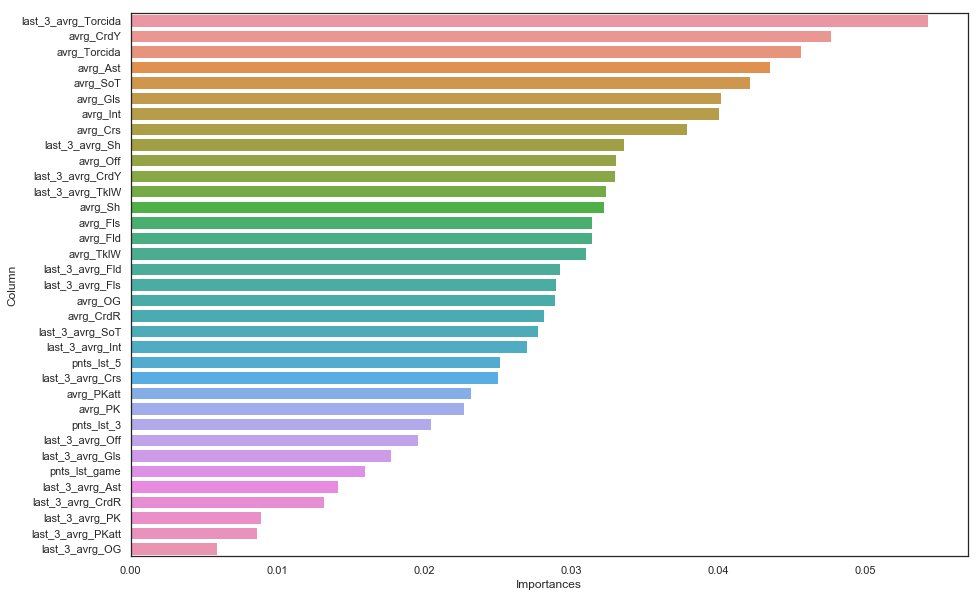

In [641]:
importance = clf_random.feature_importances_

list_1 = []
list_2 = []
for i,j in zip(importance,entradas.columns):
    list_1.append(str(j))
    list_2.append(i)
    
df_name = pd.DataFrame(list_1,columns=["Column"])
df_number = pd.DataFrame(list_2,columns=["Importances"])

df_ranking = pd.concat([df_name, df_number], axis=1)
df_final = df_ranking.sort_values("Importances",ascending=False).reset_index(drop=True)
df_final.Column = df_final.Column.astype(str)
f, ax = plt.subplots(figsize=(15, 10))
sns.barplot(x="Importances", y="Column", data=df_final)
